In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\Duy.TC214885\AppData\Local\miniconda3\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
cardboard = []
for i in range(1,404):
    temp = tf.keras.preprocessing.image.load_img(
        path = "dataset-resized/cardboard/cardboard"+str(i)+".jpg",
        grayscale=False, color_mode='rgb',target_size=(227,227))
    X = np.array(temp)
    cardboard.append(X)
cardboard = np.array(cardboard)
cardboard = np.take(cardboard,np.random.permutation(cardboard.shape[0]),axis=0)
print(cardboard.shape)

(403, 227, 227, 3)


In [3]:
glass = []
for i in range(1,502):
    temp = tf.keras.preprocessing.image.load_img(
        path = "dataset-resized/glass/glass"+str(i)+".jpg",
        grayscale=False, color_mode='rgb',target_size=(227,227))
    X = np.array(temp)
    glass.append(X)
glass = np.array(glass)
glass = np.take(glass,np.random.permutation(glass.shape[0]),axis=0)
print(glass.shape)

(501, 227, 227, 3)


In [4]:
metal = []
for i in range(1,411):
    temp = tf.keras.preprocessing.image.load_img(
        path = "dataset-resized/metal/metal"+str(i)+".jpg",
        grayscale=False, color_mode='rgb',target_size=(227,227))
    X = np.array(temp)
    metal.append(X)
metal = np.array(metal)
metal = np.take(metal,np.random.permutation(metal.shape[0]),axis=0)
print(metal.shape)

(410, 227, 227, 3)


In [5]:
paper = []
for i in range(1,595):
    temp = tf.keras.preprocessing.image.load_img(
        path = "dataset-resized/paper/paper"+str(i)+".jpg",
        grayscale=False, color_mode='rgb',target_size=(227,227))
    X = np.array(temp)
    paper.append(X)
paper = np.array(paper)
paper = np.take(paper,np.random.permutation(paper.shape[0]),axis=0)
print(paper.shape)

(594, 227, 227, 3)


In [6]:
plastic = []
for i in range(1,483):
    temp = tf.keras.preprocessing.image.load_img(
        path = "dataset-resized/plastic/plastic"+str(i)+".jpg",
        grayscale=False, color_mode='rgb',target_size=(227,227))
    X = np.array(temp)
    plastic.append(X)
plastic = np.array(plastic)
plastic = np.take(plastic,np.random.permutation(plastic.shape[0]),axis=0)
print(plastic.shape)

(482, 227, 227, 3)


In [7]:
trash = []
for i in range(1,138):
    temp = tf.keras.preprocessing.image.load_img(
        path = "dataset-resized/trash/trash"+str(i)+".jpg",
        grayscale=False, color_mode='rgb',target_size=(227,227))
    X = np.array(temp)
    trash.append(X)
trash = np.array(trash)
trash = np.take(trash,np.random.permutation(trash.shape[0]),axis=0)
print(trash.shape)

(137, 227, 227, 3)


In [8]:
train_X = np.vstack((cardboard[:302,:,:,:],glass[:376,:,:,:],metal[:307,:,:,:],
                    paper[:445,:,:,:],plastic[:361,:,:,:],trash[:103,:,:,:]))
test_X = np.vstack((cardboard[302:,:,:,:],glass[376:,:,:,:],metal[307:,:,:,:],
                   paper[445:,:,:,:],plastic[361:,:,:,:],trash[103:,:,:,:]))
train_Y = np.zeros((6,train_X.shape[0]))
test_Y = np.zeros((6,test_X.shape[0]))
for i in range(train_X.shape[0]):
    if(i<302):
        train_Y[0][i] = 1
    elif(i<678):
        train_Y[1][i] = 1
    elif(i<985):
        train_Y[2][i] = 1
    elif(i<1430):
        train_Y[3][i] = 1
    elif(i<1791):
        train_Y[4][i] = 1
    else:
        train_Y[5][i] = 1
for i in range(test_X.shape[0]):
    if(i<101):
        test_Y[0][i] = 1
    elif(i<226):
        test_Y[1][i] = 1
    elif(i<329):
        test_Y[2][i] = 1
    elif(i<478):
        test_Y[3][i] = 1
    elif(i<599):
        test_Y[4][i] = 1
    else:
        test_Y[5][i] = 1

In [9]:
test_X_re = test_X
test_Y_re = test_Y

In [10]:
np.random.seed(1013)
train_perm = np.random.permutation(train_X.shape[0])
train_X = np.take(train_X,train_perm,axis=0)
print(train_X.shape)
train_Y = np.take(train_Y,train_perm,axis=1)
print(train_Y.shape)
np.random.seed(901)
test_perm = np.random.permutation(test_X.shape[0])
test_X = np.take(test_X,test_perm,axis=0)
print(test_X.shape)
test_Y = np.take(test_Y,test_perm,axis=1)
print(test_Y.shape)

(1894, 227, 227, 3)
(6, 1894)
(633, 227, 227, 3)
(6, 633)


In [11]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,height_shift_range=0.1, rotation_range=45, zoom_range=0.1,
    horizontal_flip=True,vertical_flip=True)
train_gen.fit(train_X)

In [12]:
def AlexNetCE(input_shape = (227, 227, 3), classes = 6):
    X_input = tf.keras.Input(input_shape)
    X = X_input
    X = tf.keras.layers.Conv2D(96, (11, 11), strides = (4, 4), activation = "relu", name = 'conv1')(X)
    X = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = tf.keras.layers.Conv2D(256, (5, 5), padding = "same",activation = "relu", name = 'conv2')(X)
    X = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_conv2')(X)
    X = tf.keras.layers.Conv2D(256, (3, 3), padding = "same",activation = "relu", name = 'conv5')(X)
    X = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(4096, activation = "relu", name='fc' + str(1))(X)
    X = tf.keras.layers.Dense(4096, activation = "relu", name='fc' + str(2))(X)
    X = tf.keras.layers.Dense(classes, activation='softmax', name='fc' + str(classes))(X)

    model = tf.keras.Model(inputs = X_input, outputs = X, name='ALEXNETCE')

    return model

In [13]:
model = AlexNetCE()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000005), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "ALEXNETCE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 bn_conv1 (BatchNormalizati  (None, 27, 27, 96)        384       
 on)                                                             
                                                                 
 conv2 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0 

Training Process 0
60/60 [==============================] - 41s 649ms/step - loss: 1.5581 - accuracy: 0.4013
Test Result 0
20/20 [==============================] - 2s 91ms/step - loss: 4.5361 - accuracy: 0.2385
Loss = 4.536067962646484
Test Accuracy = 0.23854660987854004
Training Process 1
60/60 [==============================] - 38s 635ms/step - loss: 1.2918 - accuracy: 0.4963
Test Result 1
20/20 [==============================] - 2s 92ms/step - loss: 2.3724 - accuracy: 0.3254
Loss = 2.3723719120025635
Test Accuracy = 0.32543444633483887
Training Process 2
60/60 [==============================] - 44s 738ms/step - loss: 1.2303 - accuracy: 0.5327
Test Result 2
20/20 [==============================] - 3s 130ms/step - loss: 1.6013 - accuracy: 0.4376
Loss = 1.6012871265411377
Test Accuracy = 0.43759873509407043
Training Process 3
60/60 [==============================] - 48s 796ms/step - loss: 1.1390 - accuracy: 0.5660
Test Result 3
20/20 [==============================] - 2s 114ms/step - l

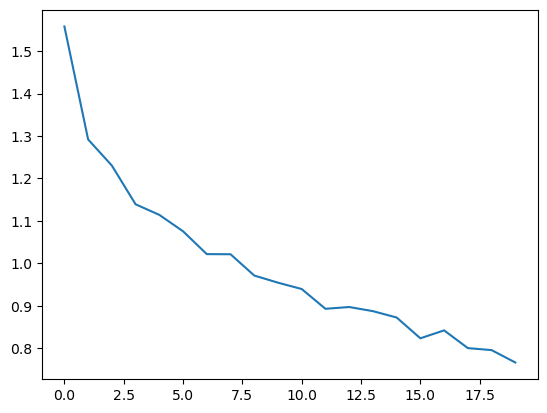

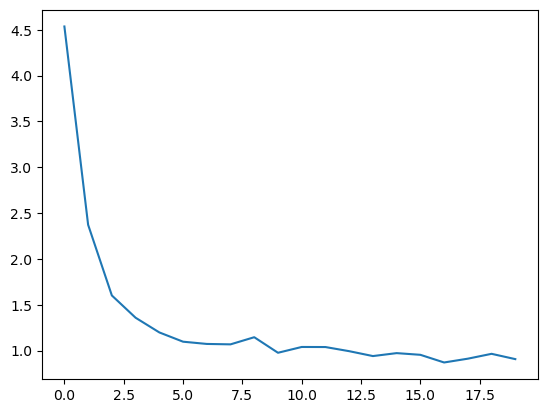

In [15]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []
for i in range(20):
    print("Training Process "+str(len(train_loss)))
    history = model.fit(train_gen.flow(train_X, train_Y.T, batch_size=32),steps_per_epoch=60,epochs=1)
    print("Test Result "+str(len(train_loss)))
    preds = model.evaluate(test_X, test_Y.T)
    print ("Loss = " + str(preds[0]))
    print ("Test Accuracy = " + str(preds[1]))
    train_loss.append(history.history["loss"][0])
    train_acc.append(history.history["accuracy"][0])
    test_loss.append(preds[0])
    test_acc.append(preds[1])
plt.plot(train_loss)
plt.show()
plt.plot(test_loss)
plt.show()

Training Process 20
60/60 [==============================] - 38s 623ms/step - loss: 0.7121 - accuracy: 0.7439
Test Result 20
20/20 [==============================] - 2s 103ms/step - loss: 0.7743 - accuracy: 0.7251
Loss = 0.7742536067962646
Test Accuracy = 0.7251184582710266
Training Process 21
60/60 [==============================] - 37s 620ms/step - loss: 0.5777 - accuracy: 0.8052
Test Result 21
20/20 [==============================] - 2s 107ms/step - loss: 0.7176 - accuracy: 0.7457
Loss = 0.7175713181495667
Test Accuracy = 0.7456555962562561
Training Process 22
60/60 [==============================] - 37s 623ms/step - loss: 0.4974 - accuracy: 0.8448
Test Result 22
20/20 [==============================] - 2s 111ms/step - loss: 0.6971 - accuracy: 0.7583
Loss = 0.6971444487571716
Test Accuracy = 0.758293867111206
Training Process 23
60/60 [==============================] - 38s 635ms/step - loss: 0.4337 - accuracy: 0.8728
Test Result 23
20/20 [==============================] - 2s 114ms/s

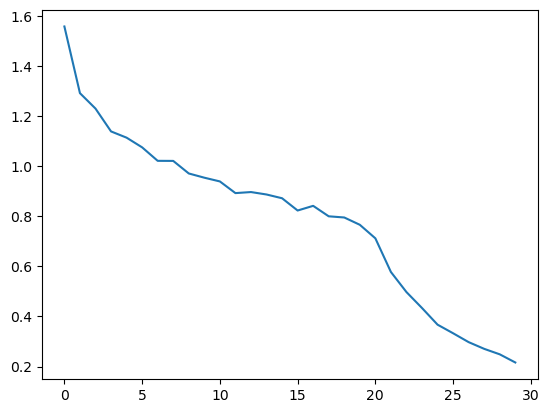

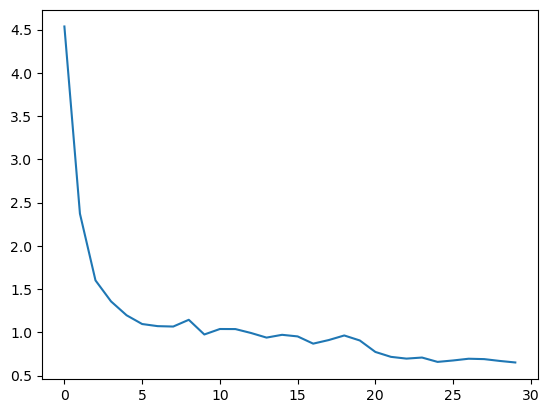

In [16]:
for i in range(10):
    print("Training Process "+str(len(train_loss)))
    history = model.fit(train_X, train_Y.T,batch_size=32,epochs=1)
    print("Test Result "+str(len(train_loss)))
    preds = model.evaluate(test_X, test_Y.T)
    print ("Loss = " + str(preds[0]))
    print ("Test Accuracy = " + str(preds[1]))
    train_loss.append(history.history["loss"][0])
    train_acc.append(history.history["accuracy"][0])
    test_loss.append(preds[0])
    test_acc.append(preds[1])
plt.plot(train_loss)
plt.show()
plt.plot(test_loss)
plt.show()

Training Process 30
60/60 [==============================] - 38s 631ms/step - loss: 0.2027 - accuracy: 0.9646
Test Result 30
20/20 [==============================] - 2s 113ms/step - loss: 0.6394 - accuracy: 0.7820
Loss = 0.6393864750862122
Test Accuracy = 0.7819905281066895
Training Process 31
60/60 [==============================] - 38s 633ms/step - loss: 0.1712 - accuracy: 0.9773
Test Result 31
20/20 [==============================] - 2s 109ms/step - loss: 0.6541 - accuracy: 0.7852
Loss = 0.6541369557380676
Test Accuracy = 0.7851500511169434
Training Process 32
60/60 [==============================] - 38s 634ms/step - loss: 0.1511 - accuracy: 0.9810
Test Result 32
20/20 [==============================] - 2s 107ms/step - loss: 0.6519 - accuracy: 0.7899
Loss = 0.651862382888794
Test Accuracy = 0.789889395236969
Training Process 33
60/60 [==============================] - 38s 628ms/step - loss: 0.1394 - accuracy: 0.9826
Test Result 33
20/20 [==============================] - 2s 107ms/st

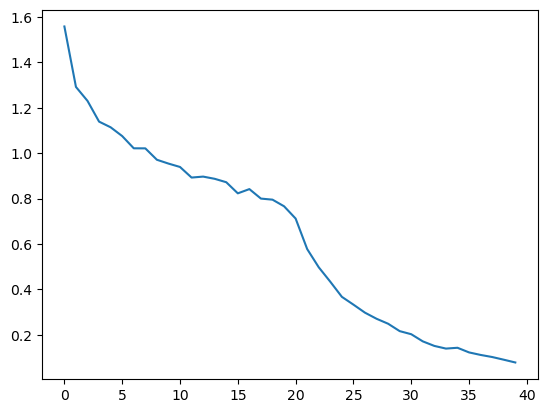

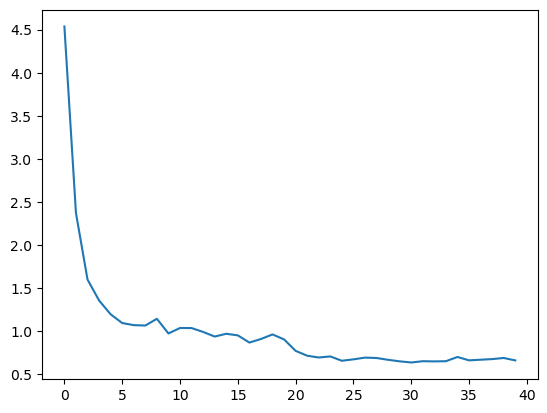

In [17]:
for i in range(10):
    print("Training Process "+str(len(train_loss)))
    history = model.fit(train_X, train_Y.T,batch_size=32,epochs=1)
    print("Test Result "+str(len(train_loss)))
    preds = model.evaluate(test_X, test_Y.T)
    print ("Loss = " + str(preds[0]))
    print ("Test Accuracy = " + str(preds[1]))
    train_loss.append(history.history["loss"][0])
    train_acc.append(history.history["accuracy"][0])
    test_loss.append(preds[0])
    test_acc.append(preds[1])
plt.plot(train_loss)
plt.show()
plt.plot(test_loss)
plt.show()

Training Process 40
60/60 [==============================] - 38s 635ms/step - loss: 0.0768 - accuracy: 0.9937
Test Result 40
20/20 [==============================] - 2s 110ms/step - loss: 0.6563 - accuracy: 0.7867
Loss = 0.6562631130218506
Test Accuracy = 0.7867298722267151
Training Process 41
60/60 [==============================] - 37s 619ms/step - loss: 0.0697 - accuracy: 0.9958
Test Result 41
20/20 [==============================] - 2s 107ms/step - loss: 0.6716 - accuracy: 0.7820
Loss = 0.6716306805610657
Test Accuracy = 0.7819905281066895
Training Process 42
60/60 [==============================] - 37s 624ms/step - loss: 0.0643 - accuracy: 0.9947
Test Result 42
20/20 [==============================] - 2s 110ms/step - loss: 0.6641 - accuracy: 0.7820
Loss = 0.6641375422477722
Test Accuracy = 0.7819905281066895
Training Process 43
60/60 [==============================] - 38s 627ms/step - loss: 0.0581 - accuracy: 0.9974
Test Result 43
20/20 [==============================] - 2s 111ms/

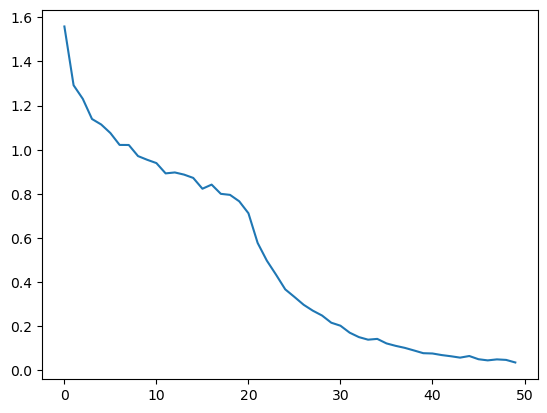

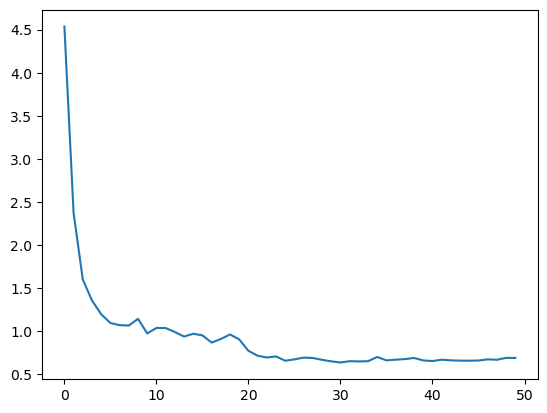

In [18]:
for i in range(10):
    print("Training Process "+str(len(train_loss)))
    history = model.fit(train_X, train_Y.T,batch_size=32,epochs=1)
    print("Test Result "+str(len(train_loss)))
    preds = model.evaluate(test_X, test_Y.T)
    print ("Loss = " + str(preds[0]))
    print ("Test Accuracy = " + str(preds[1]))
    train_loss.append(history.history["loss"][0])
    train_acc.append(history.history["accuracy"][0])
    test_loss.append(preds[0])
    test_acc.append(preds[1])
plt.plot(train_loss)
plt.show()
plt.plot(test_loss)
plt.show()

Training Process 50
60/60 [==============================] - 37s 620ms/step - loss: 0.0372 - accuracy: 0.9989
Test Result 50
20/20 [==============================] - 2s 107ms/step - loss: 0.6957 - accuracy: 0.7788
Loss = 0.6957069635391235
Test Accuracy = 0.7788309454917908
Training Process 51
60/60 [==============================] - 37s 624ms/step - loss: 0.0398 - accuracy: 0.9958
Test Result 51
20/20 [==============================] - 2s 108ms/step - loss: 0.7024 - accuracy: 0.7867
Loss = 0.7024321556091309
Test Accuracy = 0.7867298722267151
Training Process 52
60/60 [==============================] - 38s 630ms/step - loss: 0.0364 - accuracy: 0.9974
Test Result 52
20/20 [==============================] - 2s 109ms/step - loss: 0.7252 - accuracy: 0.7820
Loss = 0.7251726388931274
Test Accuracy = 0.7819905281066895
Training Process 53
60/60 [==============================] - 38s 635ms/step - loss: 0.0308 - accuracy: 0.9979
Test Result 53
20/20 [==============================] - 2s 112ms/

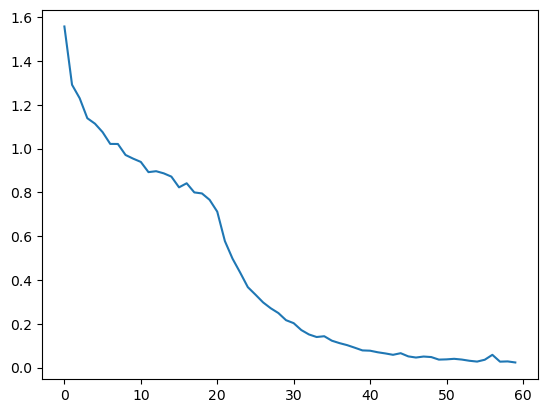

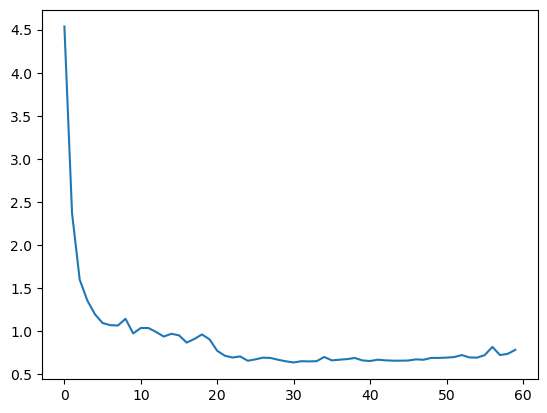

In [19]:
for i in range(10):
    print("Training Process "+str(len(train_loss)))
    history = model.fit(train_X, train_Y.T,batch_size=32,epochs=1)
    print("Test Result "+str(len(train_loss)))
    preds = model.evaluate(test_X, test_Y.T)
    print ("Loss = " + str(preds[0]))
    print ("Test Accuracy = " + str(preds[1]))
    train_loss.append(history.history["loss"][0])
    train_acc.append(history.history["accuracy"][0])
    test_loss.append(preds[0])
    test_acc.append(preds[1])
plt.plot(train_loss)
plt.show()
plt.plot(test_loss)
plt.show()

In [20]:
error = [0,0,0,0,0,0]
mislabel = np.zeros((6,6))
prediction = model.predict(test_X_re)
for i in range(test_X_re.shape[0]):
    if(test_Y_re[np.argmax(prediction,axis=1)[i],i] == 0):
        if(i<101):
            error[0] = error[0]+1
            mislabel[0][np.argmax(prediction,axis=1)[i]] += 1
        elif(i<226):
            error[1] = error[1]+1
            mislabel[1][np.argmax(prediction,axis=1)[i]] += 1
        elif(i<329):
            error[2] = error[2]+1
            mislabel[2][np.argmax(prediction,axis=1)[i]] += 1
        elif(i<478):
            error[3] = error[3]+1
            mislabel[3][np.argmax(prediction,axis=1)[i]] += 1
        elif(i<599):
            error[4] = error[4]+1
            mislabel[4][np.argmax(prediction,axis=1)[i]] += 1
        else:
            error[5] = error[5]+1
            mislabel[5][np.argmax(prediction,axis=1)[i]] += 1

20/20 [==============================] - 2s 111ms/step


In [21]:
total = np.array([101,125,103,149,121,34])
error = np.array(error)
error = np.divide(error,total)
print("% of mislabeled cardboard: "+str(error[0]))
print("Mostly mislabeled as: "+str(np.argmax(mislabel,axis=0)[0]))
print("% of mislabeled glass: "+str(error[1]))
print("Mostly mislabeled as: "+str(np.argmax(mislabel,axis=0)[1]))
print("% of mislabeled metal: "+str(error[2]))
print("Mostly mislabeled as: "+str(np.argmax(mislabel,axis=0)[2]))
print("% of mislabeled paper: "+str(error[3]))
print("Mostly mislabeled as: "+str(np.argmax(mislabel,axis=0)[3]))
print("% of mislabeled plastic: "+str(error[4]))
print("Mostly mislabeled as: "+str(np.argmax(mislabel,axis=0)[4]))
print("% of mislabeled trash: "+str(error[5]))
print("Mostly mislabeled as: "+str(np.argmax(mislabel,axis=0)[5]))

% of mislabeled cardboard: 0.10891089108910891
Mostly mislabeled as: 2
% of mislabeled glass: 0.152
Mostly mislabeled as: 4
% of mislabeled metal: 0.46601941747572817
Mostly mislabeled as: 3
% of mislabeled paper: 0.12080536912751678
Mostly mislabeled as: 4
% of mislabeled plastic: 0.3305785123966942
Mostly mislabeled as: 1
% of mislabeled trash: 0.35294117647058826
Mostly mislabeled as: 2


In [22]:
f = open('train_loss_aug_p.txt', 'w')
for i in train_loss:
    f.write(str(i))
    f.write("\n")
f.close()

In [24]:
f = open('train_acc_aug_p.txt', 'w')
for i in train_acc:
    f.write(str(i))
    f.write("\n")
f.close()

In [25]:
f = open('test_acc_aug_p.txt', 'w')
for i in test_acc:
    f.write(str(i))
    f.write("\n")
f.close()